In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
# allows us to run terminal commands
import subprocess

class State(TypedDict):
  # the video input file
  video_file: str
  # the audio input file
  audio_file: str
  # the transcription of the video
  transcription: str

In [ ]:
def extract_audio(state: State):
  # extract the audio of mp4 file using ffmpeg

  # converts mp4 video into mp3 audio file
  output_file = state["video_file"].replace("mp4", "mp3")

  # ffmpeg command to extract audio from video
  # e.g. $ ffmpeg -i input.mp4 output.avi
  command = [
    "ffmpeg",
    "-i",
    state["video_file"],
    # filter to the audio
    "-filter:a",
    # speed up video (doesn't change the quality of transcription but cheaper since shorter video)
    "atempo=2.0",
    output_file
  ]

  # run the command in the terminal
  subprocess.run(command)

  # update the 'audio_file' state
  return {
    "audio_file": output_file
  }

def transcribe_audio(state: State):
  # transcribe the audio file using whisper
  pass

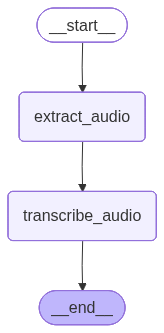

In [3]:

# create the state graph
graph_builder = StateGraph(State)

# create the nodes using the predefined functions
graph_builder.add_node("extract_audio", extract_audio)
graph_builder.add_node("transcribe_audio", transcribe_audio)

# create the edges between the nodes
graph_builder.add_edge(START, "extract_audio")
graph_builder.add_edge("extract_audio", "transcribe_audio")
graph_builder.add_edge("transcribe_audio", END)

# compile the graph
graph = graph_builder.compile()

graph

In [ ]:
graph.invoke({"video_file": "video.mp4"})